# Lab 3

**In this tutroal, you will learn PCA, SVD and Dual PCA in section 1, 2 and 3, respectively.**

## Section 1: Principal Component Analysis

In this section, you will learn the following:
* How to load the dataset
* How to show images in python through matplotlib library
* What is the role of PCA (Principal Component Analysis) 
* What are unsupervised learning methods and linear algorithms
* What are the eigenvectors and eigenvalues of a given matrix
* How to derive the covariance matrix of a given dataset
* How to derive the eigenvectors and eigenvalues of a given matrix
* How to do Singular Value Decomposition (SVD)
* How to do dimensional reduction using PCA.
* How to produce scatter plots using Matplotlib 

To do the exercise, you need to fill in some code below to produce the results displayed. Suggested solutions will be posted on Canvas at a later date.

### How to load the dataset

A dataset consists of samples or examples, where samples are data points (mathematically $\boldsymbol{x}^{(i)} \in \mathbb{R}^{d}$ denotes the i-th data point $\boldsymbol{x}^{(i)}$ which has $d$ features or variables. For example, when $d$ is equal to $3$, $\boldsymbol{x}$ represents a 3-dimensional point) without paired labels, while examples are data points with paired labels. 

Thus, a dataset $X$ of $n$ samples can be represented in the form of $X=[\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},\cdots,\boldsymbol{x}^{(n)}]\in \mathbb{R}^{d\times n}$.

In order to show you an example, we load a human face dataset, which contains 165 faces (each one $32\times 32$ pixels). Additionally, this dataset is separated into two sub-datasets which are the training dataset and the test dataset. 

The whole dataset is saved in `yale_face_data.mat`:

In [14]:
import scipy.io as sio
import numpy as np

Firstly, you need to import the necessary packages, which are `scipy` and `numpy`. A brief explanation of these packages are described below:

* `scipy`: a senior mathematical package that also includes some matlab functions. Here, we only utilise it to import data that has `.mat` type.
* `numpy`: a computing package for solutions to basic mathematical problems and common operations, such as matrix multiplication function `numpy.dot` and reshaping function `numpy.reshape` which could reshape a matrix to our desired shape  

In [15]:
dataFile = 'yale_face_data.mat'
data = sio.loadmat(dataFile)

We import the saved data through the `scio.loadmat` function from the scio libaray. 

Here, `data` is the original dataset we have imported. It contains four parts, i.e., "train_fea", "train_gnd", "test_fea" and "test_gnd". Next, we will use these four components to create our training dataset and test dataset.

In [16]:
X_training=data["train_fea"]
label_training=data["train_gnd"]
X_test=data["test_fea"]
label_test=data["test_gnd"]

`X_training` and `X_test` are two sub-datasets of the given face dataset `data`, while `label_training` and `label_test` are their paired labels. As PCA is an unsupervised method, we won't need to use `label_training` and `label_test` in the following. 

In [5]:
pixel,num = X_training.shape
pixel_test,num_text = X_test.shape
print('The shape of X_training: (%dx%d)' %(pixel,num))
print('The shape of X_test: (%dx%d)' %(pixel_test,num_text))

The shape of X_training: (1024x120)
The shape of X_test: (1024x45)


We could see that `X_training` and `X_test` both have $1024$ features ($1024=32\times 32$), while the number of examples of `X_training` and `X_test` is $120$ and $45$ respectively.

### How to show images  in python through `matplotlib` libarary

In [6]:
import matplotlib.pyplot as plt 

Let's import `matplotlib.pyplot` to our code first. This package has some sub-functions we will use, e.g, `imshow`, `axis` and `show`.

In [7]:
x_1 = X_training[:,0]
x_1 = np.reshape(x_1,(32,32))

We select the first datapoint $\boldsymbol{x}^{(1)}$ (here we use variable `x_1` in our code) of the training dataset $X$ by slicing the `X_training`. Then we reshape it to a form of $32\times 32$ through the `numpy` function `np.reshape`

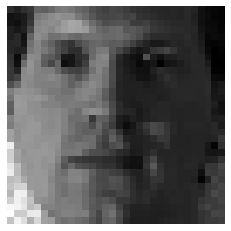

In [8]:
plt.imshow(np.rot90(x_1,-1), cmap ='gray') # show image
plt.axis('off') # hide axis
plt.show()

We showed this face by using the `plt.imshow`, `plt.axis` and `plt.show`:
* `plt.imshow`: a function that can plot images in different color maps. Here we use the grayscale to our image by setting its attribute `cmap` to a gray map. Note you can only see the image after you run the `plt.show` function.
* `plt.axis`: a function that is used to set axis. Here we use it to high the axis.
* `plt.show`: a function that shows the data you have defined in `plt.imshow`.

We can plot all images in the training set using the code in the following two blocks. Note that in this dataset we have 15 people, each having 8 images showing different emotions

In [9]:
from matplotlib import gridspec

def showImages(image_matrix, nrow = 15, ncol = 8):

    fig = plt.figure(figsize=(ncol+1, nrow+1)) 

    gs = gridspec.GridSpec(nrow, ncol,
             wspace=0.1, hspace=0.1, 
             top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
             left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

    for i in range(nrow):
        for j in range(ncol):
            ax= plt.subplot(gs[i,j])
            x = image_matrix[:, i*ncol+j]
            ax.imshow(np.rot90(np.reshape(x,(32,32)),-1), cmap ='gray')
            ax.axis('off')   
    plt.show()  

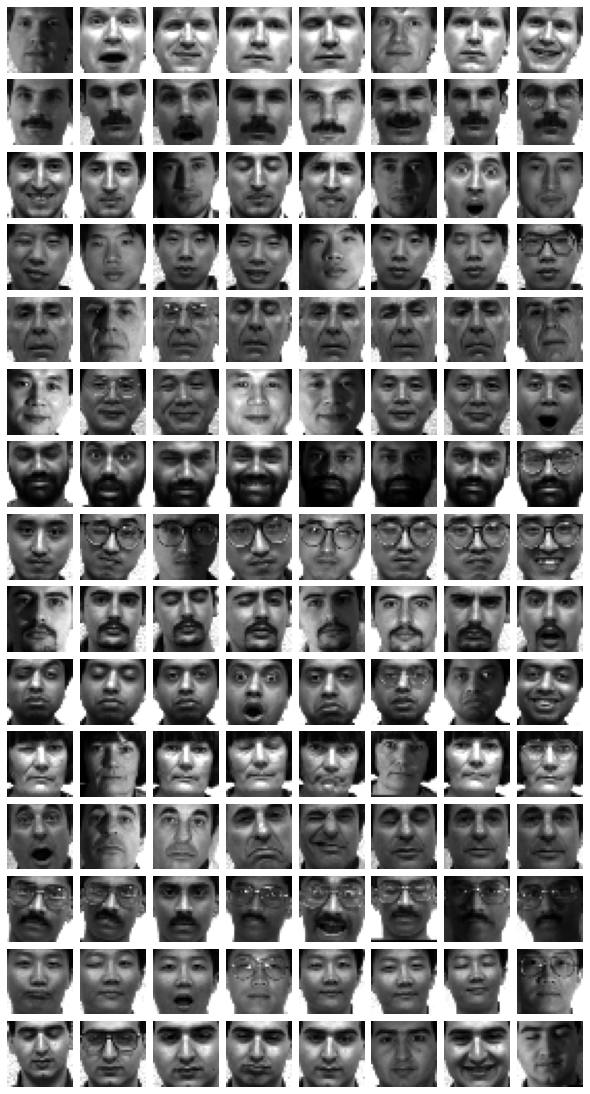

In [10]:
showImages(X_training)

### What is the role of PCA (Principal Component Analysis)

PCA is a linear unsupervised algorithm that could reduce the dimensionality of a given dataset while attempting to retain as much information as possible. So when should you use PCA in practice?

* **If you want to reduce the number of variables (features), yet you do not know which one should be deleted.**
* **If you want to ensure your features are independent of any other features.**
* **If you want to visualise high dimensional data, which can not be visualised within the scope of our visual perception.**"

### What are unsupervised learning methods and linear algorithms

In general, unsupervised algorithms are machine learning algorithms that do not use labels, while supervised algorithms are those that use labels.

For instance, if you teach an algorithm to learn how to discriminate between dogs and cats by giving them examples to tell them which is a dog and which is a cat. That is a supervised algorithm. Otherwise, if you teach it without giving information about training labels, it will be an unsupervised algorithm.

### What are the eignvectors and eignvalues of a given matrix

Geometrically, eigenvectors of a matrix are a set of the orthogonal basis of a space which is consists of columns of this matrix. While the eigenvalues record the variations of data points in these directions (vectors' directions). 

Mathematically, the eignvactors and eignvalues of a matrix $A$ are defined as
$$A\boldsymbol{p}=\lambda\boldsymbol{p},$$
where $\boldsymbol{p}$ is the eignvector and $\lambda$ is the corresponding eignvalue

### How to compute the covariance matrix of a given dataset

The covariance matrix of $X$ is defined as ${(X-\bar X)(X-\bar X)^T}$ (The matrix is strictly a covariance matrix if 1/n is mutlipled. But this does not matter as both matrices have same eigenvectors which are really used for downstream computations), while $\bar X$ is the mean matrix each column of which is the mean of all the columns of $X$ and $n$ is the number of samples in the training set.

In [11]:
import numpy as np

x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [7,8,9]])
x1 = np.mean(x, axis = 1) 
print(x)
print(x1)
print(x.shape)
print(x1.shape)
avg = np.reshape(x1,(2,2))
print(avg)
avg_ba = np.tile(avg, (2,2)).T
print(avg_ba.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [7 8 9]]
[2. 5. 8. 8.]
(4, 3)
(4,)
[[2. 5.]
 [8. 8.]]
(4, 4)


(1024, 120)


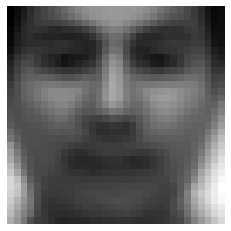

(1024, 120)


In [13]:
avg_face_vector = np.mean(X_training, axis = 1) 
print(X_training.shape)
# print(avg_face_vector.shape)
# print('The shape of avg_face_vector: %d' %(avg_face_vector.shape[0]))
avg_face = np.reshape(avg_face_vector,(32,32))
plt.imshow(np.rot90(avg_face,-1), cmap ='gray') # show image
plt.axis('off') # hide axis
plt.show()

X_ba = np.tile(avg_face_vector, (num,1)).T
print(X_ba.shape)
######################################################################################
# write your code here to compute covariance matrix (X-X_ba)(X-X_ba)^T (one line code)
S = (np.dot((X_training-X_ba),(X_training-X_ba).T))/num
######################################################################################
# print('The shape of the covariance matrix S is: %d by %d' %(S.shape))

In [24]:
data = np.array([1,2,3])
dataM = np.mean(data)
print(data)
print(dataM)
data_ba = dataM
print(data_ba)
print(data-data_ba)

[1 2 3]
2.0
2.0
[-1.  0.  1.]


Above, first we plot the mean face by averaging all columns of the image matrix `X_training` which represents training set $X$. We then derive the mean matrix `X_ba` by tiling (repeating) `avg_face_vector` the times of number of training samples. Covariance matrix $S$ can be computed from `(X_training- X_ba)(X_training- X_ba)^T/n`. Alternatively you can use numpy built-in function `S = np.cov(X_training, bias=True)` to compute covariance matrix (subject to a 1/n scale). Note that you should choose one for the following computations.

In [155]:
############################################################################################################
# write your code here to compute covariance matrix (X-X_ba)(X-X_ba)^T using built-in np.cov (one line code)
S = np.cov(X_training,bias=True)
############################################################################################################

We can show all average faces in the mean matrix `X_ba` below

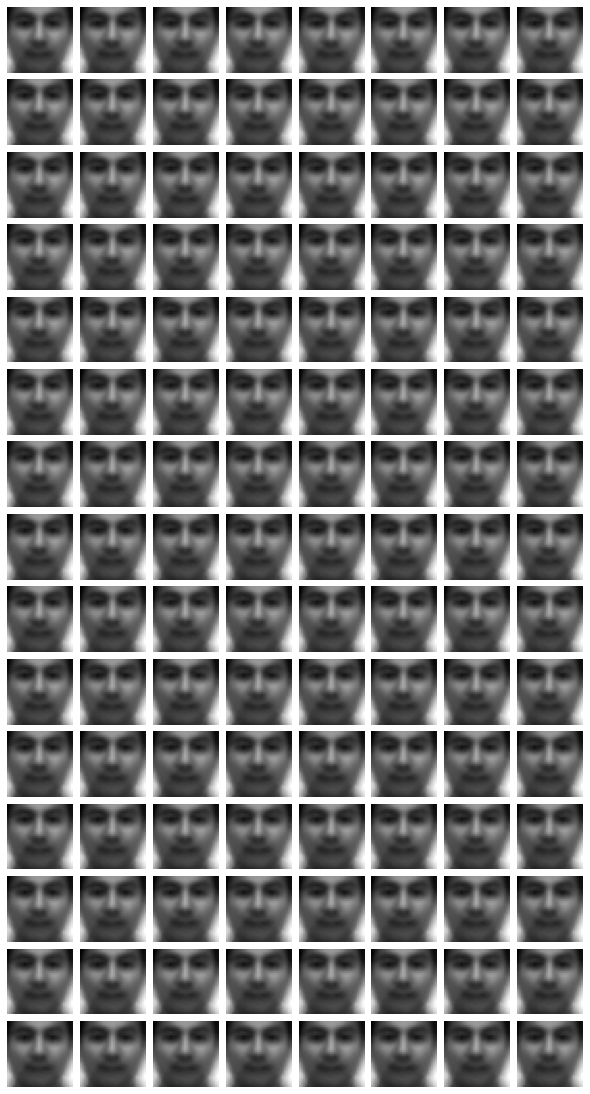

In [156]:
showImages(X_ba)

### How to do dimensionality reduction through PCA.
PCA reduces dimensionality of the dataset $X$ by projecting it to the directions of the top-p maximum variance of $X$. That is to say, we should compute the eigenvectors and eigenvalues of the covariance matrix of $X$ and select the p eigenvectors corresponding to the top-p maximum eigenvalues of the covariance matrix $S$. These eigenvectors can be used to project $X\in \mathbb{R}^{d\times n}$ to $Y\in \mathbb{R}^{p\times n}$ using
$$Y=U_p^TX,$$
where $U_p$ is a matrix whose columns are the eigenvectors corresponding to the top-p maximum eigenvalues of the covariance matrix $S$. Note that it takes a while to run through the below code as eigen-decomposition on a 1024x1024 matrix is not that cheap. 

In [157]:
################################################################################################################################
# write your code here to compute eigenvalues and eigenvectors of covariance matrix S using numpy built-in function np.linalg.eig
# the function returns eig_val (eigenvalues) and eig_vec (eigenvectors) for the following computations. (one line code)
eig_val, eig_vec = np.linalg.eig(S)
print(eig_val.shape)
print(eig_vec.shape)
################################################################################################################################

(1024,)
(1024, 1024)


In [160]:
def select_top_p_eigenvectors(eig_val, eig_vec, p):
    
    ################################################################################################################################
    # write your code here (three lines are enough). The code first returns the indices that would sort eig_val in a descending order
    # then, return the p indices eig_val_ind corresponding to top-p eigenvalues. 
    value_sort = eig_val.argsort()[::-1]
    eig_val_ind = value_sort[0:p]
    ################################################################################################################################
    U_p = eig_vec[:,eig_val_ind] # eig_val_ind is used to retrieve top-p eigenvectors  
    return U_p

In [161]:
U_p = select_top_p_eigenvectors(eig_val, eig_vec, 2)
Y = np.dot(U_p.T, X_training-X_ba) # always project centralised data

print("The shape of U_p is (%dx%d)"%(U_p.shape))
print("The shape of Y is (%dx%d)"%(Y.shape))

The shape of U_p is (1024x2)
The shape of Y is (2x120)


As we can be seen X is reduced to a $2\times 120$ matrix (Y). The functions we used to do PCA are described below:

* `np.linalg.eig`: a function to solve the eigenvectors and eigenvalues 
* `np.argsort`: a sort function that could observe the index of the ranked array (from min to max)

### How to produce scatter plots using Matplotlib
We now show the reduced dataset in a 2-dim space. We now can see what the reduced dataset look like by using the plot function `plt.scatter`.

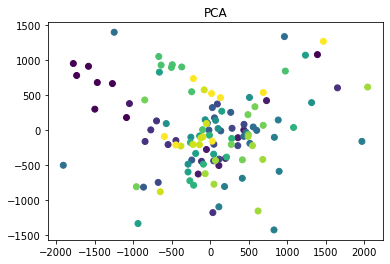

In [88]:
Y = np.real(Y)
plt.figure()
plt.title("PCA")
plt.scatter(Y[0, :], Y[1, :], c=label_training[0,:])

As you can see, we use `plt.scatter` to show datapoints and their labels (component `c`).
Additionally, we use `np.real` to ensure the Y is in real space. The used functions are introduced as follows
* `plt.scatter`: a plot function whose inputs are every dimension of the dataset we want to show and their labels.
* `plt.title`: a function to name your figure.
* `plt.figure`: a function to create a figure.

### What doe eigenfaces (eigenvectors of $X$) look like?

Have a guess what they look like? We will now show the eignevectors in image form. Please write down your code in the cell below:

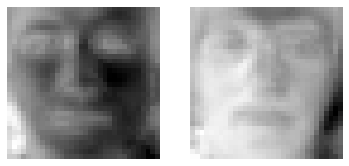

In [89]:
U_p = select_top_p_eigenvectors(eig_val, eig_vec, 2)
U_p = np.real(U_p)
u_1 = U_p[:,0]
u_1 = np.reshape(u_1,(32,32))
u_2 = U_p[:,1]
u_2 = np.reshape(u_2,(32,32))

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(np.rot90(u_1,-1), cmap ='gray') # show image
ax1.axis('off') # hide axis
ax2 = fig.add_subplot(122)
ax2.imshow(np.rot90(u_2,-1), cmap ='gray') # show image
ax2.axis('off') # hide axis

plt.show()

As you can see, they look like human faces! Below, we plot first 120 eigenfaces (eigenvectors) of the training dataset.

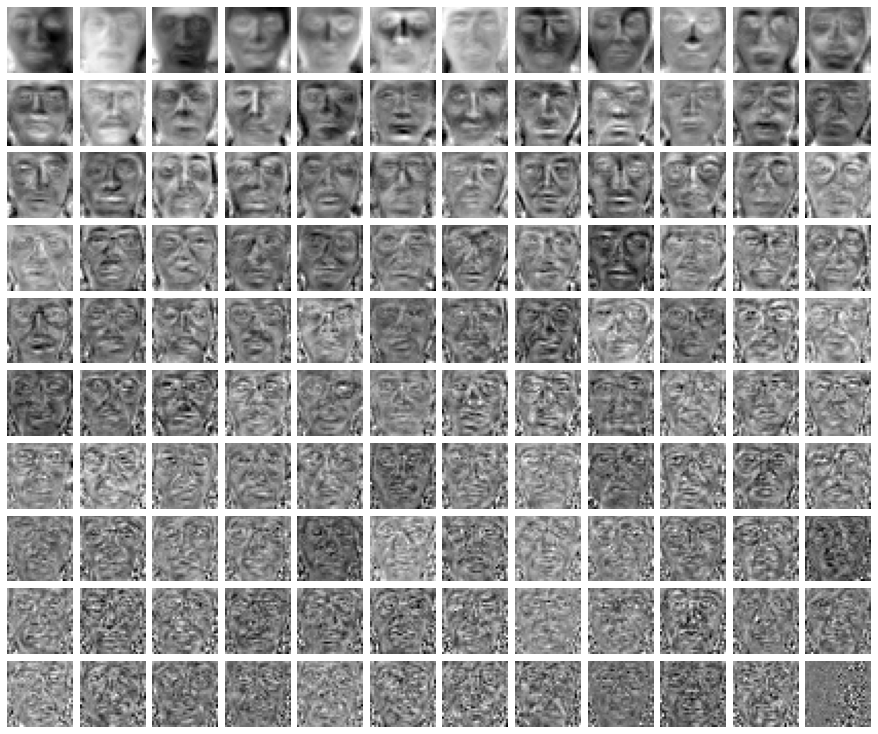

In [90]:
U_p = select_top_p_eigenvectors(eig_val, eig_vec, 120)
showImages(np.real(U_p), 10, 12)

### How to recover the data.

Recover training data: 
$$\tilde X=U_pY=U_pU_p^TX$$

Below, we cover data from `Y` projected onto the first 2, 10, 50 and 120 principal components (PCs), respectively.

In [25]:
for p in [2, 10, 50, 120]:
    
    U_p = select_top_p_eigenvectors(eig_val, eig_vec, p)
    U_p = np.real(U_p)
    print(U_p.shape)
    ################################################################################################################################
    # write your code here to project centralised data to Y using np.dot (one line code)
    Y = np.dot(U_p.T,X_training-X_ba)
    ################################################################################################################################
    
    
    ################################################################################################################################
    # write your code here to recover data X_tilde from Y using np.dot (one line code)
    X_tilde = np.dot(U_p,Y)
    ################################################################################################################################
    X_tilde = X_tilde[:,1] + avg_face_vector  # always remember to add mean back
    X_tilde = np.reshape(X_tilde,(32,32))

    original = X_training[:,1]
    original = np.reshape(original,(32,32))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(X_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()

NameError: name 'select_top_p_eigenvectors' is not defined

As you can see, the more PCs we project data onto, the closer to the original data we can recover the projected data.

### How to project the test example and recover it

The projected test data could be described as this:
$$\boldsymbol y=U_p^T\boldsymbol x$$

As for recovery:
$$\tilde {{x}}= U_p\boldsymbol y=U_pU_p^T\boldsymbol  x$$

Let us project the first sample in the test set. What we need to do is to extract mean from the sample and then project it using the eigenvectors computed from trianing set. Next, lets cover data from `y` projected onto the first 2, 10, 50 and 120 principal components (PCs), respectively.

(1024, 2)


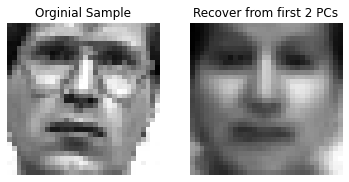

(1024, 10)


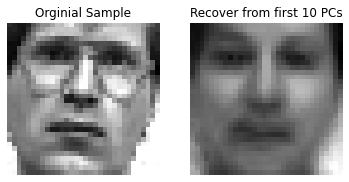

(1024, 50)


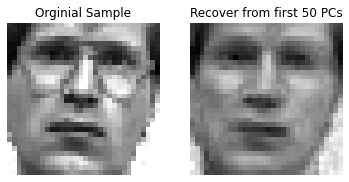

(1024, 120)


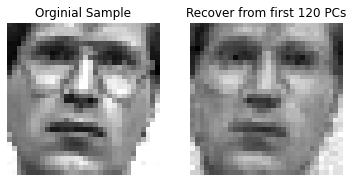

In [163]:
for p in [2, 10, 50, 120]:

    U_p = select_top_p_eigenvectors(eig_val, eig_vec, p)
    U_p = np.real(U_p)
    print(U_p.shape)
    ################################################################################################################################
    # write your code here to project centralised test data X_test[:,0] to y_1 using np.dot (one line code)
    y_1 = np.dot(U_p.T,X_test[:,0]-avg_face_vector)
    ################################################################################################################################
   
    ################################################################################################################################
    # write your code here to recover data x_1_tilde from y_1 using np.dot (one line code)
    x_1_tilde = np.dot(U_p,y_1)+avg_face_vector
    ################################################################################################################################

    original = np.reshape(X_test[:,0], (32,32))
    x_1_tilde = np.reshape(x_1_tilde, (32,32))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(x_1_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()

## Section 2: Singular Value Decomposition (SVD)
### Notations and Definition
SVD is a matrix factorisation method, which is an important concept of linear algebra. It is applied to the fields of data dimensionality reduction, recommendation system and natural language processing, and is also widely used in machine learning. The following section mainly introduces the definition and nature of SVD, calculation process and geometric interpretation.
* SVD is defined as $$A = U\Sigma V^T$$
* $U\in \mathbb{R}^{m\times m}$ is an orthogonal matrix, $V\in \mathbb{R}^{n\times n}$ is also an orthogonal matrix , and $\Sigma\in \mathbb{R}^{m\times n} $ is a rectangular diagonal matrix composed of non-negative diagonal singular values sorted in descending order. Due to these properties, we have $UU^T = U^T U=I$, $VV^T=V^TV=I$, and $\Sigma = diag(\sigma_1,\sigma_2,\cdots,\sigma_p),$ where $p= \min(m,n)$. Note that a singular value is the square root of the respective eigenvalue. 
* Additionally, we also have the following properties $$A^{T} A=\left(U \Sigma V^{T}\right)^{T}\left(U \Sigma V^{T}\right)=V\left(\Sigma^{T} \Sigma\right) V^{T}=V\Sigma^{2} V^{T}=V\Lambda V^{T}$$
$$A A^{T}=\left(U \Sigma V^{T}\right)\left(U \Sigma V^{T}\right)^{T}=U\left(\Sigma^{T} \Sigma\right) U^{T}=U\Sigma^2U^{T}=U\Lambda U^{T}$$
* Moreover, $U$ consists of eignvectors of $AA^T$ and $V$ consists of eignvectors of $A^TA$.

### Examples
We can use SVD to compute sorted eigenvectors correponding to top-p eigenvalues easily. 

In [99]:
U, sigma, V_t = np.linalg.svd(X_training-X_ba)

Above, each column of $U$ is an eigenvector of the covariance matrix $S$ and all its eigenvectors have been sorted automatically, so we can use the first $p$ eigenvectors to project as well as recover our data directly. 

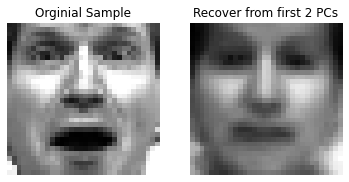

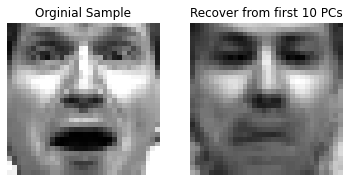

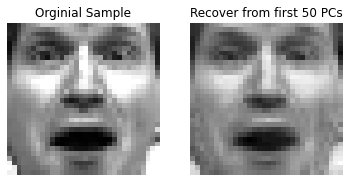

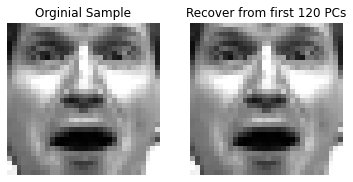

In [164]:
for p in [2, 10, 50, 120]:
    
    U_p = np.real(U[:,0:p])
    
    ################################################################################################################################
    # write your code here to project centralised training data to Y using np.dot (one line code)
    Y = np.dot(U_p.T,X_training-X_ba)
    ################################################################################################################################
   
    ################################################################################################################################
    # write your code here to recover data X_tilde from Y using np.dot (one line code)
    X_tilde = np.dot(U_p,Y)
    ################################################################################################################################
    
    X_tilde = X_tilde[:,1] + avg_face_vector  # always remember to add mean back
    X_tilde = np.reshape(X_tilde,(32,32))

    original = X_training[:,1]
    original = np.reshape(original,(32,32))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(X_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()

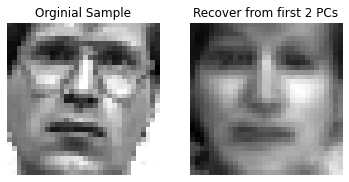

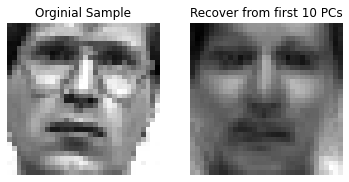

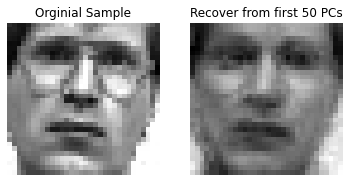

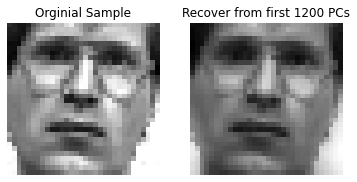

In [101]:
for p in [2, 10, 50, 1200]:

    U_p = np.real(U[:,0:p])
    
    ################################################################################################################################
    # write your code here to project centralised data X_test[:,0] to y1 using np.dot (one line code)
    y1 = np.dot(U_p.T,X_test[:,0])
    ################################################################################################################################
    
    ################################################################################################################################
    # write your code here to recover data x_1_tilde from y_1 using np.dot (one line code)
    x_1_tilde = np.dot(U_p,y1)
    ################################################################################################################################
    
    x_1_tilde = x_1_tilde + avg_face_vector
    x_1_tilde = np.reshape(x_1_tilde, (32,32))
    original = np.reshape(X_test[:,0], (32,32))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(x_1_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()

## Section 3:  Dual Principal Component Analysis

In the following tutorial, you will learn:

* What dual Principal Component Analysis (PCA) is
* How we can derive dual PCA using SVD 
* How we do dual PCA including projecting training data, recovering training data, projecting test data and recovering test data

### What is dual PCA
Dual PCA is a dimensional reduction method that uses the eigenvectors of $ X^T X$ to establish projection vectors, while PCA utilises $ X X^T$, where $X=$ `X_training - X_ba` is the centralised matrix of `X_training`. As we have introduced in the previous section, `X_ba` is the mean matrix whose every column is the mean of all the columns of `X_training`. If the dimension of data is much larger than the number of samples (which is the case in this tutorial as `1024 > 120`), the matrix $ X^T  X$ will be much smaller than $ X X^T$. Thus, we usually use dual PCA to reduce dimensions instead of PCA.

### How to project training data $X$
We need to borrow the conclusion from PCA above and establish the following equation using SVD
$$Y = U^TX=U^TU \Sigma V^{T}=\Sigma V^T$$
Note that when we project data to the first $p$ principal components we use $\Sigma_p V_p^T$, where $\Sigma_p$ consists of the first $p$ singular values on its diagonal entries and $V_p$ represent the first $p$ eigenvectors of $ X^T X$. In the following, lets project data $X$ using this derivation. First, we need to compute $X^TX$

In [180]:
#######################################################################
# write your code here to compute XtX (X-X_ba)^T(X-X_ba) (one line code)
XtX = (np.dot((X_training-X_ba).T,(X_training-X_ba)))
#######################################################################
print('The shape of the XtX matrix is: %d by %d' %(XtX.shape))

The shape of the XtX matrix is: 120 by 120


Then, we can do eigen-decomposition using `np.linalg.eig` on $X^TX$ (do not forget to normalise it by 1/num)

In [181]:
################################################################################################################################
# write your code here to compute eigenvalues and eigenvectors of XtX using numpy built-in function np.linalg.eig
# the function returns eig_val (eigenvalues) and eig_vec (eigenvectors) for the following computations. (one line code)
eig_val,eig_vec = np.linalg.eig(XtX)
################################################################################################################################

Then, we can select the $p$ eigenvectors corresponding to the top-p eigenvalues. Write the function below

In [182]:
def top_p_eigenvectors_eigenvalues(eig_val, eig_vec, p):

    
    ################################################################################################################################
    # write your code here (five lines are enough). The code first returns the indices that would sort eig_val in a descending order
    # then, return the p indices eig_val_ind corresponding to top-p eigenvalues. Finally, it returns top-p eigenvectors (eig_vec_p) 
    # and top-p eigenvalues (eig_val_p)
#     value_sort = eig_val.argsort()[::-1]
#     eig_val_ind = value_sort[0:p]
#     eig_val_p = eig_val[eig_val_ind]
#     eig_vec_p = eig_vec[:,eig_val_ind]
    eig_val_ind = np.argsort(eig_val)
    eig_val_ind = eig_val_ind[::-1]
    eig_val_ind = eig_val_ind[0:p]
    eig_vec_p = eig_vec[:,eig_val_ind]
    eig_val_p = eig_val[eig_val_ind]
    ################################################################################################################################
    
    return eig_vec_p, eig_val_p

Use the defined function, we can retrieve the top 2 eigenvectors and eigenvalues, and project data using $\Sigma_p V_p^T$.

In [183]:
V_p, S_p = top_p_eigenvectors_eigenvalues(eig_val, eig_vec, 2)
################################################################################################################################
# project data to Y using S_p and V_p (one or two lines here)
S_p = np.diag(S_p)
Y = np.dot(np.sqrt(S_p),V_p.T)
################################################################################################################################

print("The shape of V_p is (%dx%d)"%(V_p.shape))
print("The shape of Y is (%dx%d)"%(Y.shape))

The shape of V_p is (120x2)
The shape of Y is (2x120)


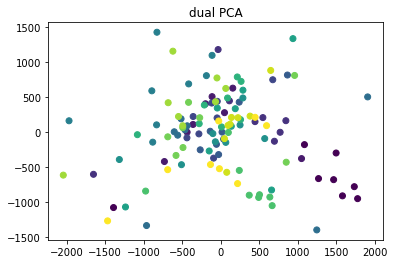

In [184]:
plt.figure()
plt.title("dual PCA")
plt.scatter(Y[0, :], Y[1, :], c=label_training[0,:])

### How to recover training data $\tilde X$
First, we need to establish the following equation from SVD
$$U = X V \Sigma ^{-1} $$

Then, we borrow the conclusion from PCA and recover data using the following equation 
$$ \tilde X = UY =  U \Sigma V^T  =  X V \Sigma ^{-1} \Sigma V^T = XV V^T $$


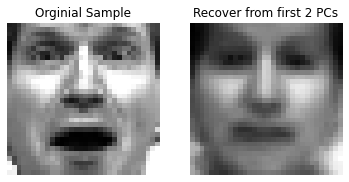

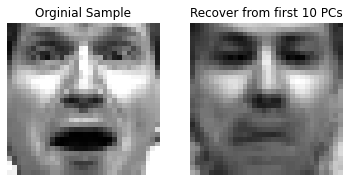

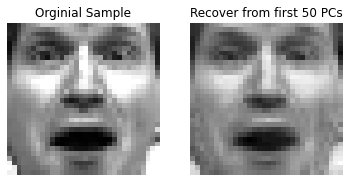

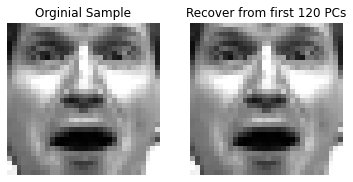

In [185]:
for p in [2, 10, 50, 120]:
    
    V_p, _ = top_p_eigenvectors_eigenvalues(eig_val, eig_vec, p) 
    
    ################################################################################################################################
    # write your code here to recover data X_tilde from centralised data X using V_p and V_p tranpose in np.dot (one or two lines code)
    X_tilde = np.dot((np.dot(X_training-X_ba,V_p)),V_p.T)
    ################################################################################################################################
   
    X_tilde = X_tilde[:,1] + avg_face_vector  # always remember to add mean back
    X_tilde = np.reshape(X_tilde,(32,32))

    original = X_training[:,1]
    original = np.reshape(original,(32,32))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(X_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()

### Project the test sample and recover it
The test sample could be projected through this equation:
$$
\boldsymbol y = \Sigma^{-1}V^TX^T(\boldsymbol x-\bar{ x})
$$
The recovery could be done with this equation:
$$
{ \tilde x}= XV\Sigma^{-2}V^TX^T(\boldsymbol x-\bar{ x})
$$

We can recover the first sample in the test set using the following code and the second equation above. 

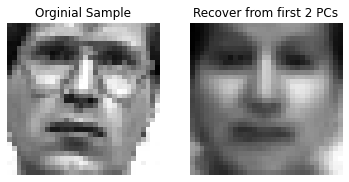

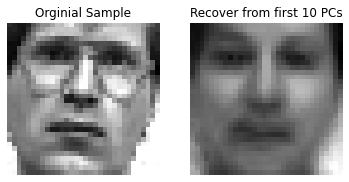

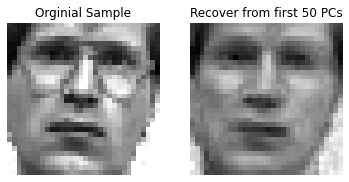

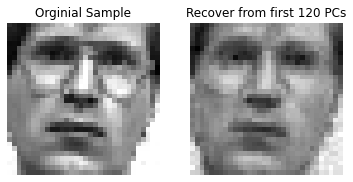

In [187]:
for p in [2, 10, 50, 120]:

    V_p, S_p = top_p_eigenvectors_eigenvalues(eig_val, eig_vec, p)
    
    ############################################################################################################################################
    # write your code here to recover data x_1_tilde from centralised test sample using the second equation above in np.dot (a few lines code) 
    X = X_training-X_ba              
    tmp = np.dot(X, V_p)
    sigma_p = np.diag(np.sqrt(S_p + 1e-8))
    tmp = np.dot(tmp, np.linalg.inv(sigma_p)**2)
    tmp = np.dot(tmp, V_p.T)
    tmp = np.dot(tmp, X.T)
    tmp = np.dot(tmp, (X_test[:,0]-avg_face_vector))
    x_1_tilde = tmp + avg_face_vector              
    ############################################################################################################################################
    
    #x_1_tilde = x_1_tilde + avg_face_vector  # always remember to add mean back            
                                  
    original = np.reshape(X_test[:,0], (32,32))
    x_1_tilde = np.reshape(x_1_tilde, (32,32))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.rot90(original,-1), cmap ='gray') # show image
    plt.title("Orginial Sample")
    ax1.axis('off') # hide axis
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.rot90(x_1_tilde,-1), cmap ='gray') # show image
    ax2.axis('off') # hide axis
    plt.title("Recover from first %d PCs"%(p))

    plt.show()
    